### Dividing data into train and test data

In [1]:
#https://stackoverflow.com/questions/60655280/how-to-split-an-image-dataset-in-x-train-y-train-x-test-y-test-by-tensorflow
import tensorflow as tf
import numpy as np
import glob
Normal = glob.glob('Preprocessed/Normal/*.*')
HB = glob.glob('Preprocessed/HB/*.*')
MI = glob.glob('Preprocessed/MI/*.*')
PMI = glob.glob('Preprocessed/PMI/*.*')

data = []
labels = []

for i in Normal:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    image=np.invert(image)
    data.append(image)
    labels.append(0)
for i in HB:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    image=np.invert(image)
    data.append(image)
    labels.append(1)
for i in MI:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    image=np.invert(image)
    data.append(image)
    labels.append(2)
for i in PMI:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale')
    image=np.array(image)
    image=np.invert(image)
    data.append(image)
    labels.append(3)

data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

#### Shapes of imported dataset

In [2]:
print('x_tarin shape:', x_train.shape)
print('y_tarin shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_tarin shape: (726, 1440, 1440)
y_tarin shape: (726,)
x_test shape: (182, 1440, 1440)
y_test shape: (182,)


#### Plot an image example

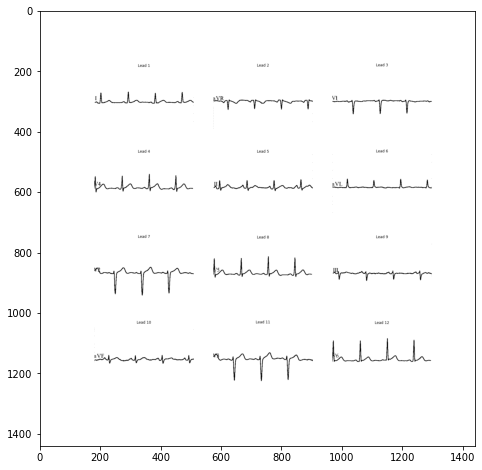

In [3]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
fig1.set_size_inches(8, 8)

ax1.imshow(x_train[0], cmap='binary')
plt.show()

#### Display Labels

In [4]:
y_train[0]

0

In [5]:
print(set(y_train))

{0, 1, 2, 3}


### Encoding Labels

In [6]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [7]:
print('y_train_encoded shape:', y_train_encoded.shape)
print('y_test_encoded shape:', y_test_encoded.shape)

y_train_encoded shape: (726, 4)
y_test_encoded shape: (182, 4)


#### Display Encoded Labels

In [8]:
y_train_encoded[0]

array([1., 0., 0., 0.], dtype=float32)

### Unrolling N-dimensional Arrays to Vectors

In [9]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (726, 2073600))
x_test_reshaped = np.reshape(x_test, (182, 2073600))

print('x_train_reshaped shape:', x_train_reshaped.shape)
print('x_test_reshaped shape:', x_test_reshaped.shape)

x_train_reshaped shape: (726, 2073600)
x_test_reshaped shape: (182, 2073600)


#### Display Pixel Values

In [10]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

### Data Normalization

In [11]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

print(x_mean)
print(x_std)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

2.73714811267664
24.068791887587864


### Display Normalized Pixel Values

In [12]:
print(set(x_train_norm[0]))

{0.8003248346327292, 0.6756821016696917, 2.7946085620413283, 3.750202848091282, 3.8332980033999737, 3.8748455810543194, 2.420680363152216, 7.904960613525863, 8.071150924143247, 9.23448309846493, 8.112698501797592, 8.154246079451939, 9.608411297354042, 9.81614918562577, 8.278888812414976, 9.359125831427967, 7.946508191180209, 9.73305403031708, 9.276030676119275, 10.397815272786612, 3.916393158708665, 3.1269891832760948, 1.3404433441392245, 4.414964090560815, 4.7057971341412355, 4.913535022412965, 5.495201109573806, 5.2043680659933855, 5.993772041425956, 5.702938997845536, 6.492342973278106, -0.07217429610853297, 6.783176016858526, 7.281746948710676, 7.780317880562826, 7.572579992291097, 8.361983967723667, 8.652817011304087, 2.129847319571795, 8.860554899575817, 8.569721855995397, 9.940791918588808, 9.649958875008387, 9.857696763280117, 9.151387943156237, 9.068292787847547, 10.356267695132267, 10.439362850440958, 10.148529806860537, 1.6312763877196452, 3.4178222268565155, 2.9192512950043

### Creating the Model

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# model = Sequential([
#     Dense(128, activation='relu', input_shape=(2073600,)),
#     Dense(128, activation='relu'),
#     Dense(4, activation='softmax')
# ])

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(50, activation='sigmoid', input_shape=(2073600,)),
    Dense(30, activation='sigmoid'),
    Dense(4, activation='softmax')
])

#### Compiling the Model

In [31]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                103680050 
                                                                 
 dense_13 (Dense)            (None, 30)                1530      
                                                                 
 dense_14 (Dense)            (None, 4)                 124       
                                                                 
Total params: 103,681,704
Trainable params: 103,681,704
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [32]:
model.fit(x_train_norm, y_train_encoded, epochs=8)

Epoch 1/8
23/23 [==============================] - 12s 256ms/step - loss: 1.3553 - accuracy: 0.3044
Epoch 2/8
23/23 [==============================] - 6s 247ms/step - loss: 1.2426 - accuracy: 0.3912
Epoch 3/8
23/23 [==============================] - 5s 233ms/step - loss: 1.1485 - accuracy: 0.6997
Epoch 4/8
23/23 [==============================] - 5s 235ms/step - loss: 1.0740 - accuracy: 0.7961
Epoch 5/8
23/23 [==============================] - 5s 233ms/step - loss: 1.0214 - accuracy: 0.8912
Epoch 6/8
23/23 [==============================] - 5s 232ms/step - loss: 0.9703 - accuracy: 0.9174
Epoch 7/8
23/23 [==============================] - 5s 234ms/step - loss: 0.9281 - accuracy: 0.9421
Epoch 8/8
23/23 [==============================] - 5s 227ms/step - loss: 0.8887 - accuracy: 0.9587


### Evaluating the model

In [33]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test set accuracy:', accuracy * 100)

6/6 [==============================] - 1s 53ms/step - loss: 0.9057 - accuracy: 0.9011
Test set accuracy: 90.1098906993866


### Exporting the model to a pickle file

In [ ]:
# save the model
import pickle
pickle.dump(model, open("NNmodel.pkl", "wb"))

### Save with model.save

In [ ]:
import os.path
model.save('NNmodels.h5')

### Save with model.save_weights()

In [ ]:
model2.save_weights('wheightmodel.h5')

### Save as JSON with model.to_json()

In [ ]:
json_string = model.to_json()

In [ ]:
json_string

In [ ]:
json_string = '{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 2073600], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 2073600], "dtype": "float32", "units": 726, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 128, "activation": "sigmoid", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "dtype": "float32", "units": 4, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}]}, "keras_version": "2.8.0", "backend": "tensorflow"}'

### Loading the saved model

In [ ]:
import tensorflow as tf
import numpy as np
import glob
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model('NNmodel.h5')

In [ ]:
# load the model
import pickle
model3 = pickle.load(open('NNmodel.pkl', 'rb'))

In [ ]:
from tensorflow.keras.models import model_from_json
model3 = model_from_json(json_string)

### Predictions on Test Set

In [34]:
preds = model.predict(x_test_norm)
print('shape of preds', preds.shape)

shape of preds (182, 4)


### Plotting the Results

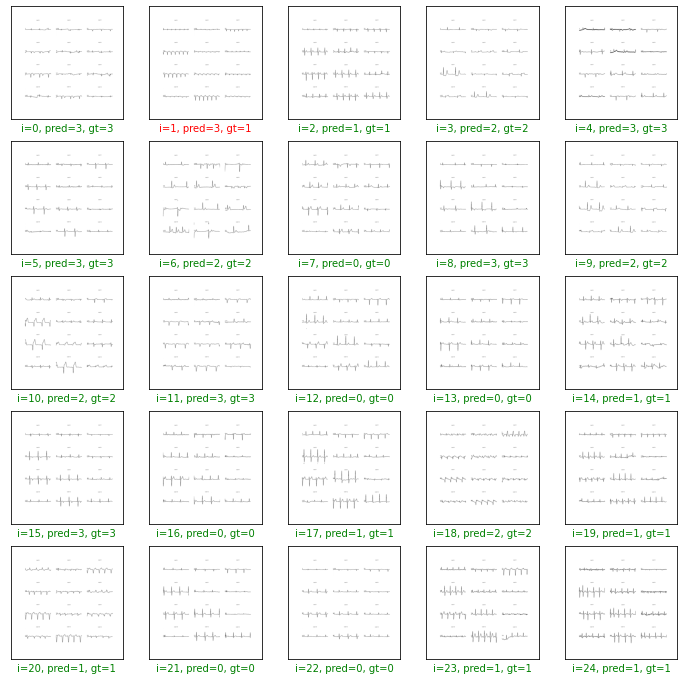

In [35]:
plt.figure(figsize=(12, 12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]
    
    col = 'g'
    if pred != gt:
        col = 'r'
        
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(x_test[start_index+i], cmap='binary')
plt.show()
